### Objective

    Predicting Heart Disease. Analyze the data set and identify most relevant heart disease related risk factors as well as predict the overall risk.
Possible Work to be done
1. Perform exploratory analysis on the data and describe your understanding of the data.
2. Perform data wrangling / pre-processing
a.       E.g., missing data, normalization, discretization, etc.
3. Apply any two feature selection engineering techniques
4. Compare the two selected feature engineering techniques.
5. Plot top 5, 6, and 8 features.
6. Provide a high-level description of Machine Learning models – Logistic regression and Decision tree, ANN to predict.
7. Compare the performance of the two classifiers – Logistic regression and Decision tree to predict.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/Heart.csv


In [8]:
data = pd.read_csv('./data/Heart.csv')
data = data.dropna()
target = 'TenYearCHD'
X = data.drop(target,1)
y = data[target]


In [9]:
from imblearn.over_sampling import SMOTE 


In [10]:
sm = SMOTE(random_state=26)
X_res, y_res = sm.fit_resample(X, y)

In [12]:
X_res.shape, y_res.shape

((6198, 15), (6198,))

In [37]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [54]:
y_res.value_counts()

0    3099
1    3099
Name: TenYearCHD, dtype: int64

<AxesSubplot:>

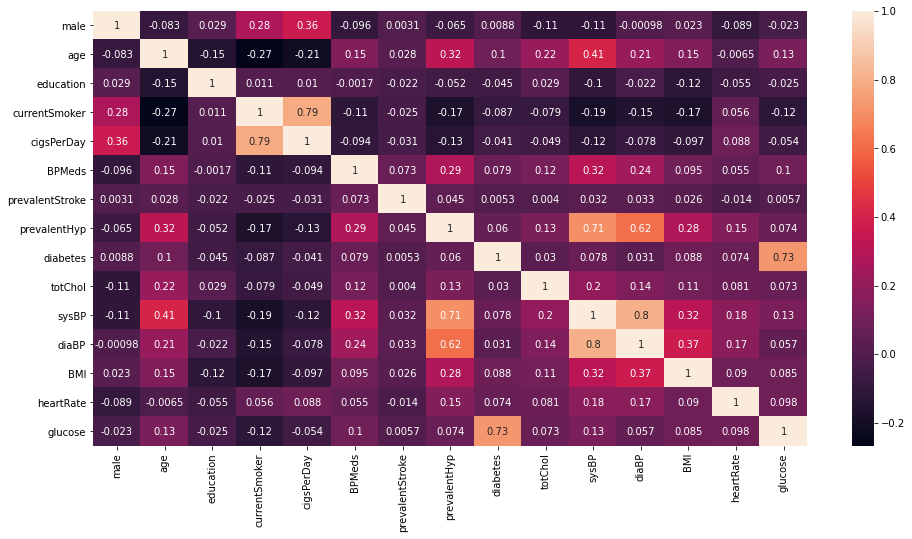

In [55]:
plt.figure(figsize=(16,8))
sns.heatmap(X_res.corr(), annot=True)

In [58]:
df_discreet = [x for x in X_res.columns if X_res[x].nunique() < 39]
df_discreet = X_res[df_discreet]
df_discreet

,male,currentSmoker,prevalentStroke,prevalentHyp,diabetes
0,1,0,0,0,0
1,0,0,0,0,0
2,1,1,0,0,0
3,0,1,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
6193,1,1,0,0,0
6194,0,0,0,1,0
6195,1,0,0,0,0
6196,0,0,0,0,0


In [60]:
data[target].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

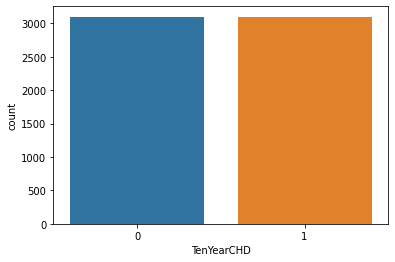

In [61]:
sns.countplot(x=y_res)

## the data is imbalance must smot it

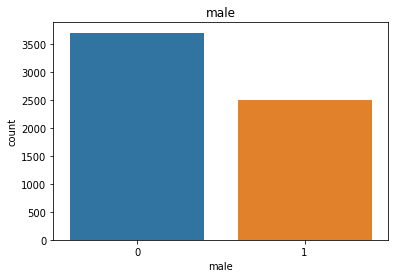

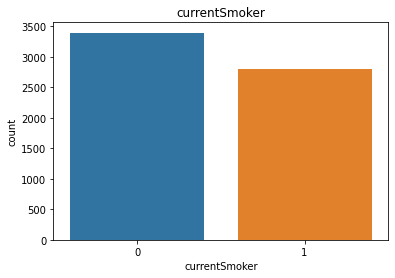

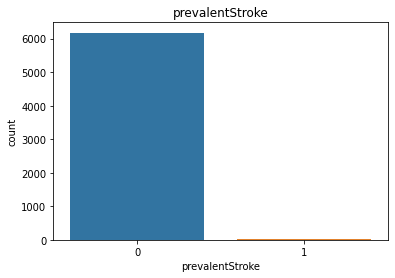

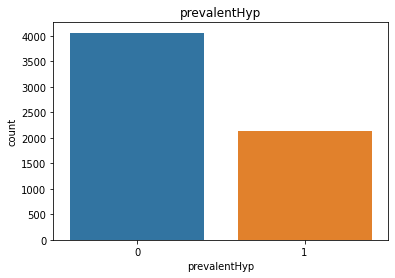

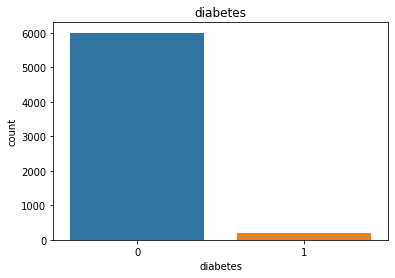

In [62]:
for x in df_discreet.columns:
    sns.countplot(x=df_discreet[x])
    plt.title(x)
    plt.show()

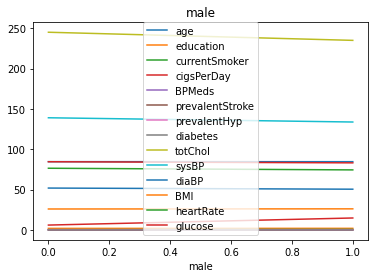

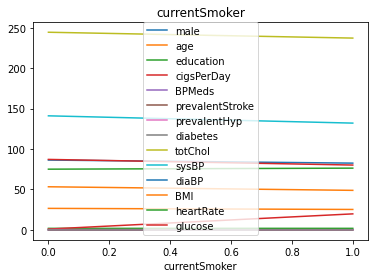

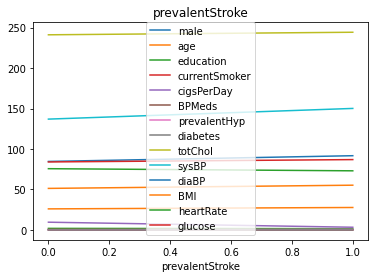

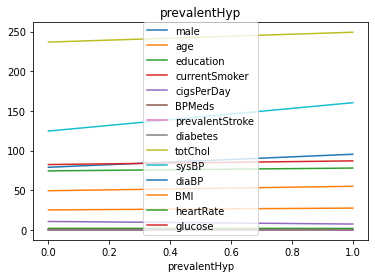

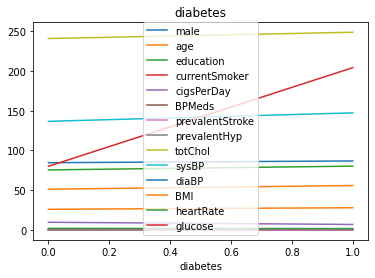

In [72]:
for x in df_discreet.columns:
    df = data.copy()
    X_res.groupby(x)[y_res].mean().plot()
    plt.title(x)
    plt.show()

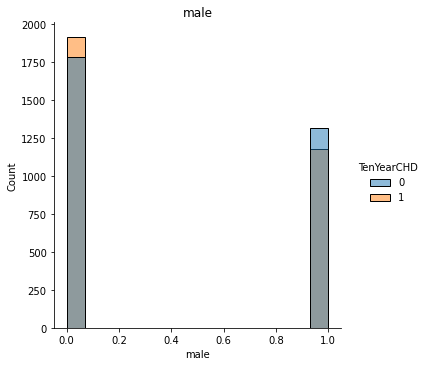

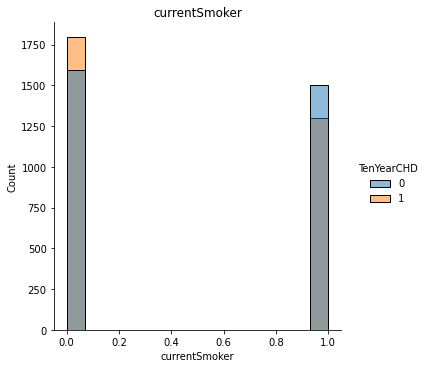

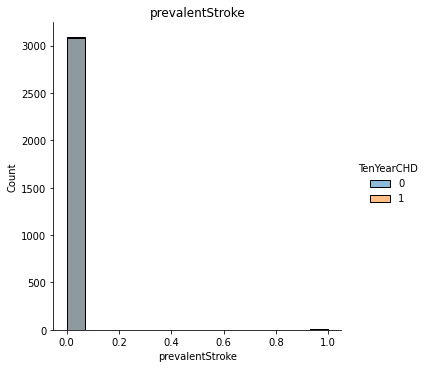

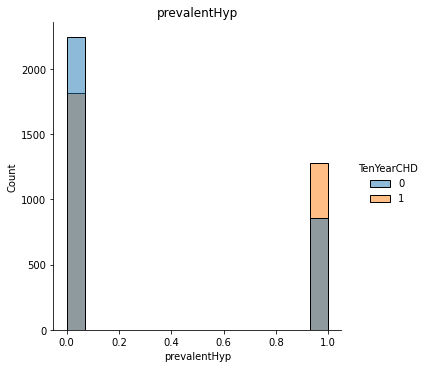

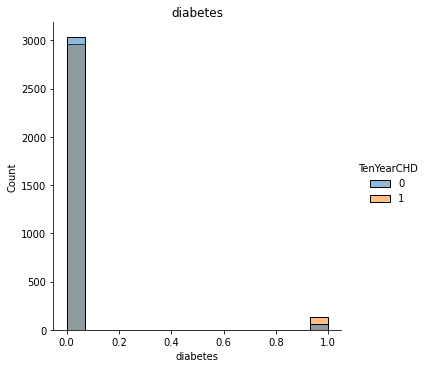

In [74]:
for x in df_discreet.columns:
    df = data.copy()
    sns.displot(data=X_res,x=x,hue=y_res)
    plt.title(x)
    plt.show()

In [75]:
df_cont = [x for x in X_res.columns if x not in df_discreet.columns]
df_cont = X_res[df_cont]
df_cont

,age,education,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,4.000000,0.000000,0.000000,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000
1,46,2.000000,0.000000,0.000000,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000
2,48,1.000000,20.000000,0.000000,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000
3,61,3.000000,30.000000,0.000000,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000
4,46,3.000000,23.000000,0.000000,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000
...,...,...,...,...,...,...,...,...,...,...
6193,45,1.000000,30.000000,0.000000,333.873524,130.494096,74.000000,28.712495,81.264759,75.102861
6194,62,1.325424,4.047456,0.000000,237.976272,160.396608,90.745760,27.022577,87.277968,86.277968
6195,47,2.726099,5.445741,0.000000,233.273901,113.726099,69.633722,26.767728,81.082691,106.910852
6196,50,1.662148,1.689261,0.662148,355.297182,134.337852,86.831074,28.076161,75.000000,85.648591


In [76]:
df_cont.describe()

,age,education,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000,6198.000000
mean,51.338012,1.935243,9.549572,0.046396,241.093537,136.964498,84.637894,26.025986,75.664333,84.005846
std,8.260688,0.966249,11.884148,0.190717,45.484278,24.007277,12.642136,3.877668,11.301069,29.736862
min,32.000000,1.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,45.000000,1.000000,0.000000,0.000000,210.000000,120.000000,76.000000,23.430109,68.000000,72.000000
50%,52.000000,2.000000,2.690351,0.000000,238.854790,132.000000,83.183443,25.696717,75.000000,78.000000
75%,58.000000,2.704486,20.000000,0.000000,268.000000,150.000000,91.839447,28.188570,82.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


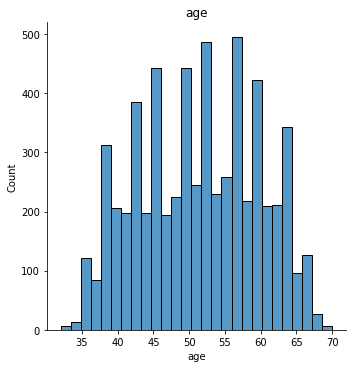

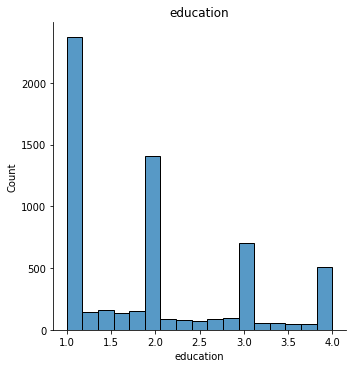

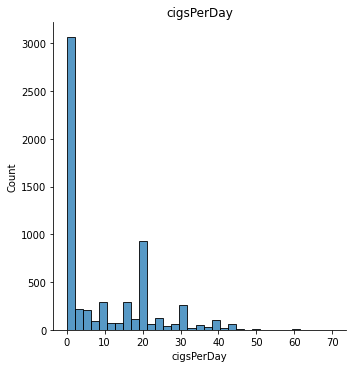

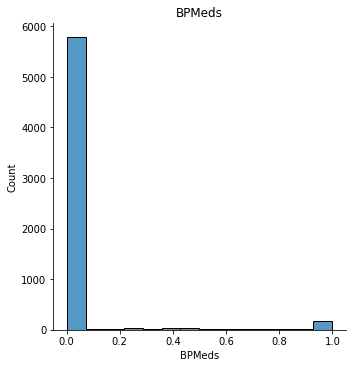

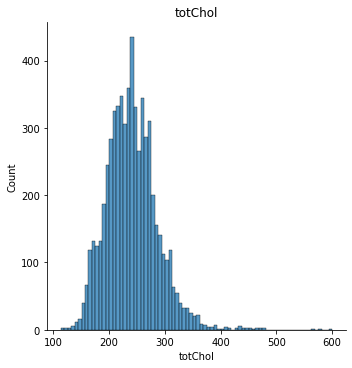

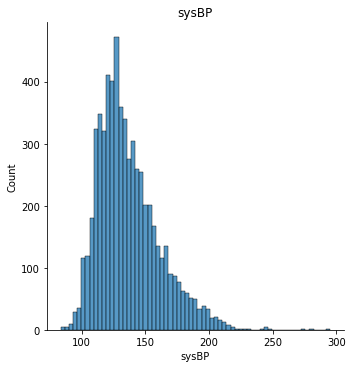

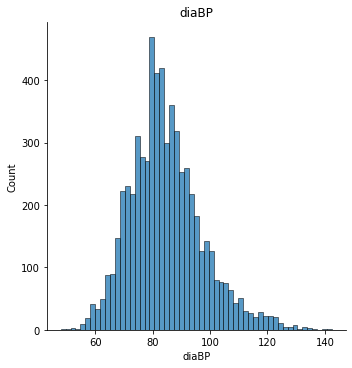

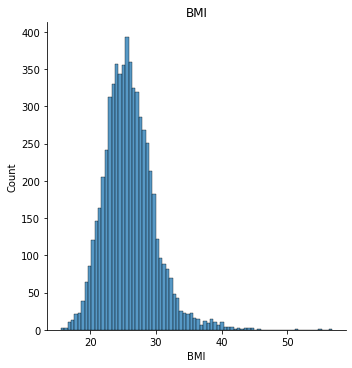

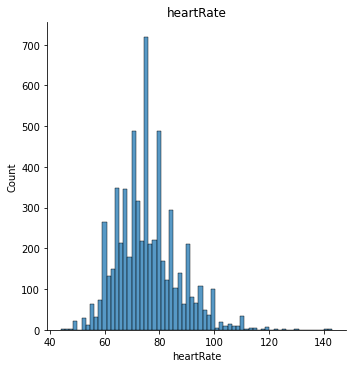

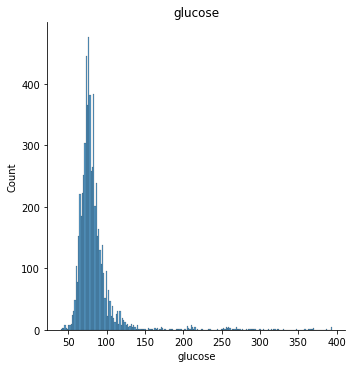

In [77]:
for col in df_cont.columns:
    sns.displot(data=df_cont,x=col)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

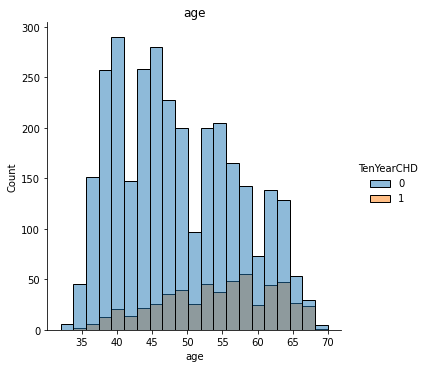

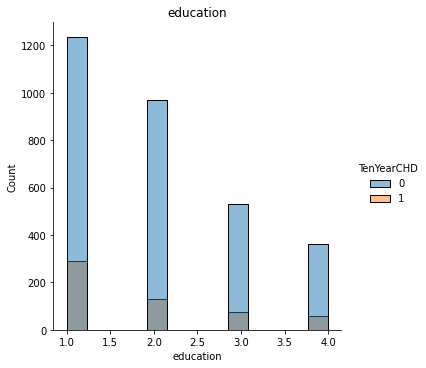

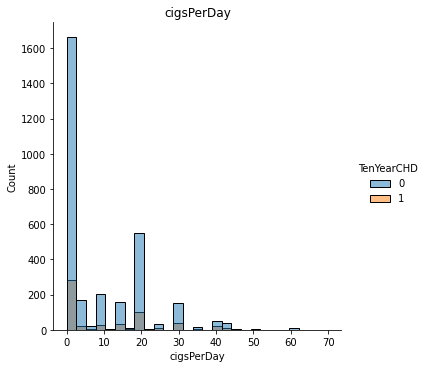

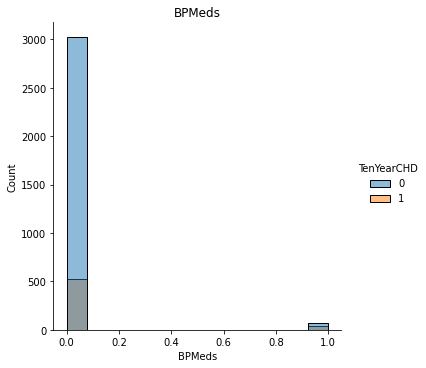

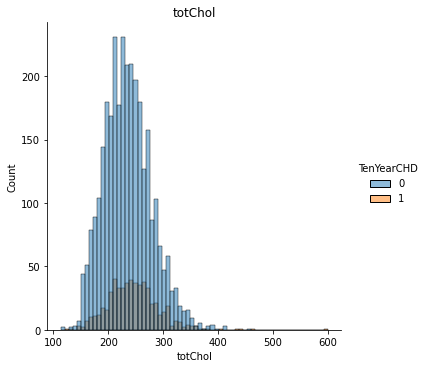

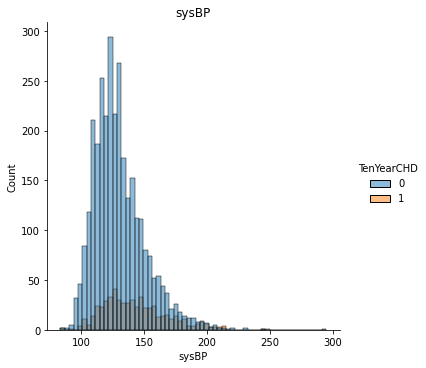

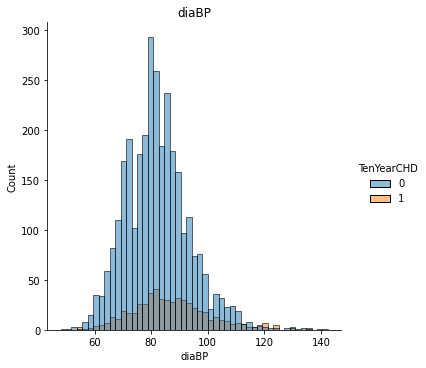

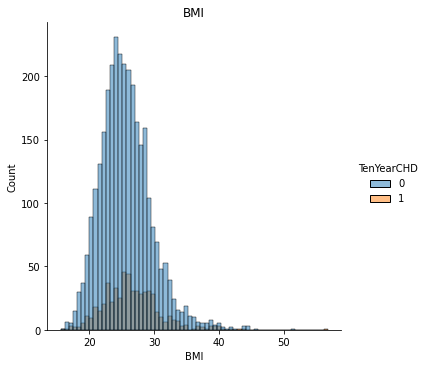

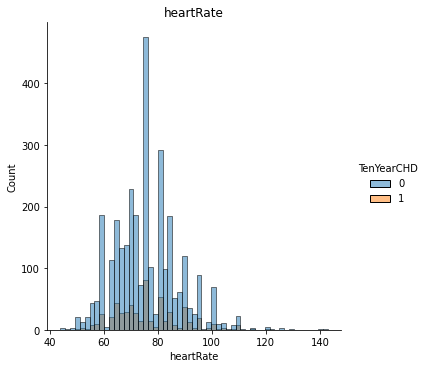

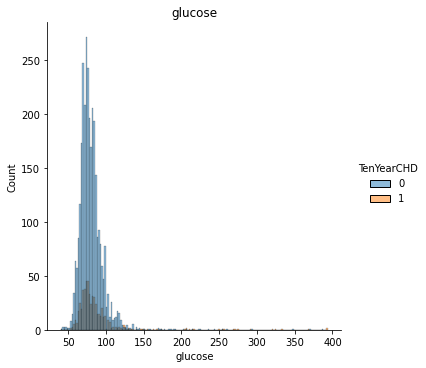

In [78]:
for col in df_cont.columns:
    df = data.copy()
    sns.displot(data=df,x=col,hue=target)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

### heart rate looks interesting as the distribution is slighly different depending on the if TenYearChd

In [81]:
X_res.heartRate.describe()

count    6198.000000
mean       75.664333
std        11.301069
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

In [ ]:
#X_res[X_res.heartRate > 82]

In [ ]:
#X_res[target].value_counts()

In [86]:
#data[data.heartRate > 82][target].value_counts()[1]/data[target].value_counts()[1]

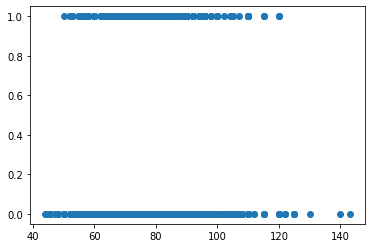

In [31]:
#plt.scatter(data.heartRate,data[target])

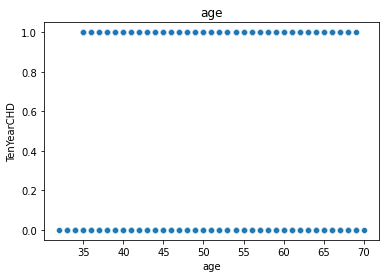

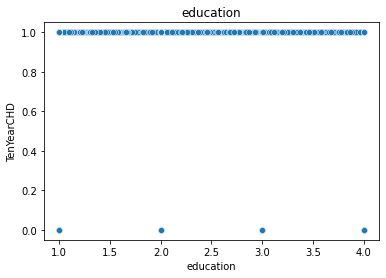

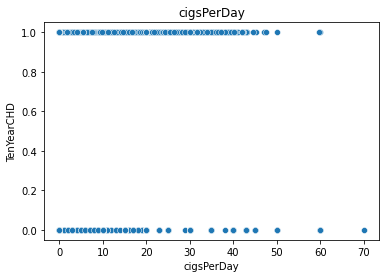

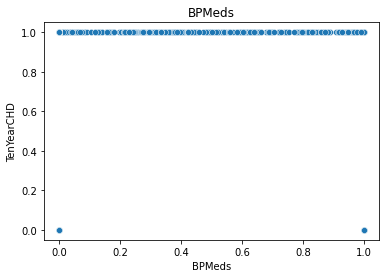

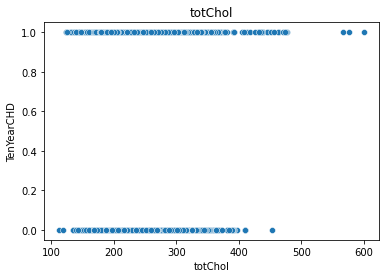

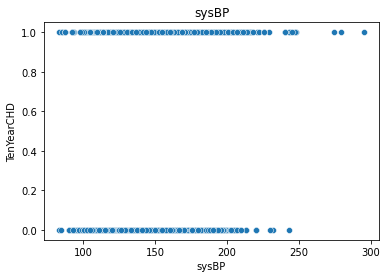

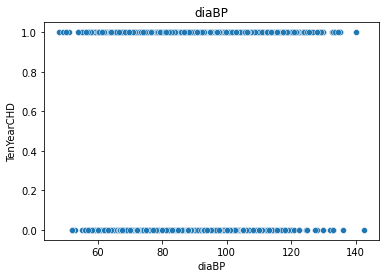

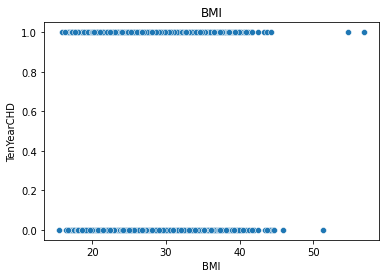

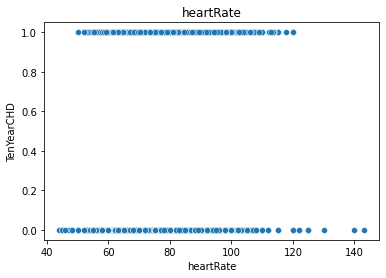

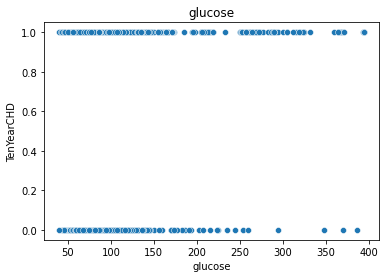

In [92]:
for col in df_cont.columns:
    df = data.copy()
    sns.scatterplot(x=X_res[col],y=y_res)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

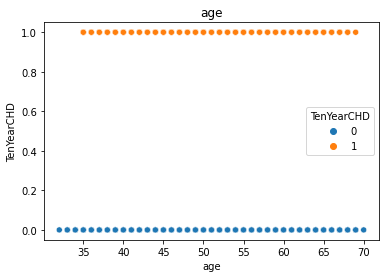

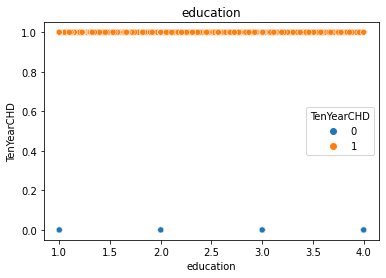

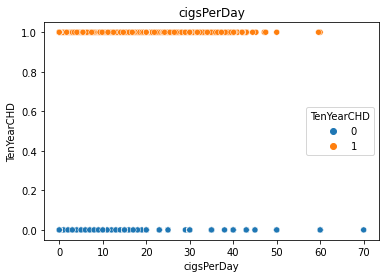

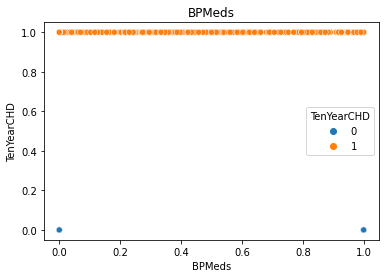

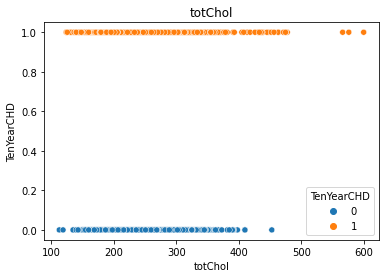

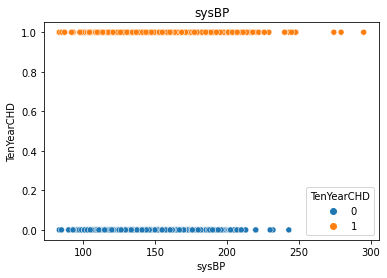

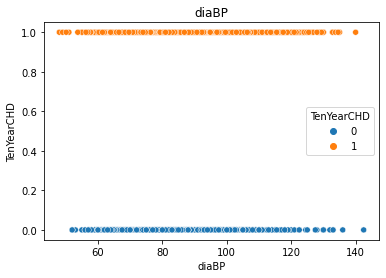

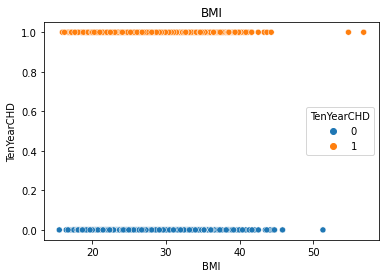

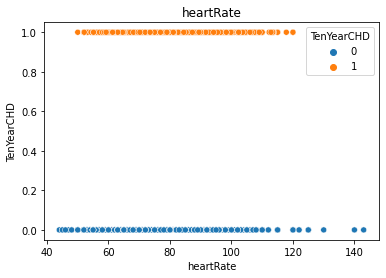

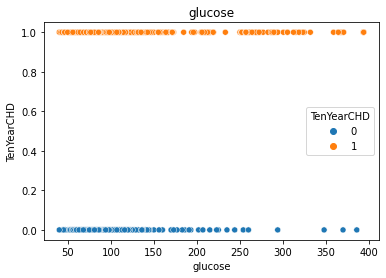

In [93]:
for col in df_cont.columns:
    df = data.copy()
    sns.scatterplot(x=X_res[col],y=y_res,hue=y_res)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

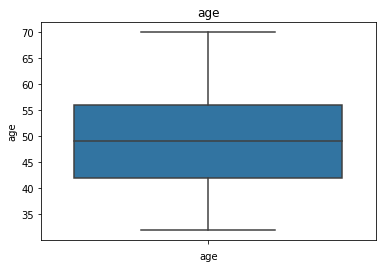

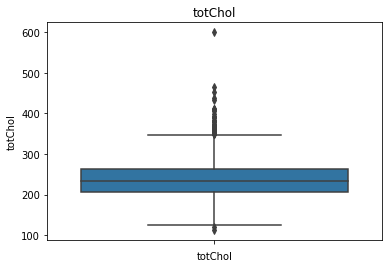

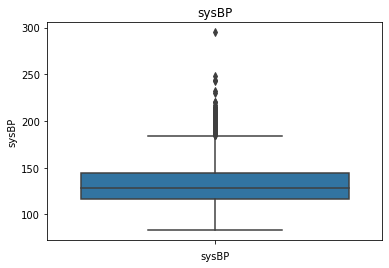

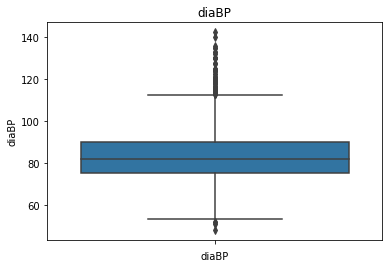

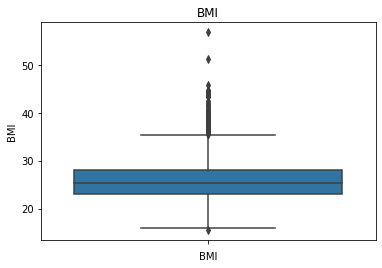

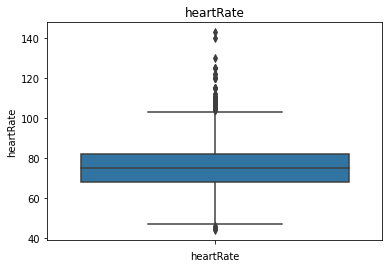

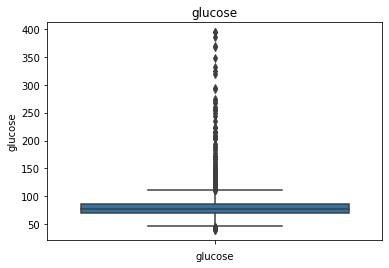

In [33]:
for col in df_cont.columns:
    sns.boxplot(data=df_cont,y=col)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [95]:
data_new = X_res.copy()

In [96]:
data_new[target] = y_res

In [97]:
data_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,1,45,1.000000,1,30.000000,0.000000,0,0,0,333.873524,130.494096,74.000000,28.712495,81.264759,75.102861,1
6194,0,62,1.325424,0,4.047456,0.000000,0,1,0,237.976272,160.396608,90.745760,27.022577,87.277968,86.277968,1
6195,1,47,2.726099,0,5.445741,0.000000,0,0,0,233.273901,113.726099,69.633722,26.767728,81.082691,106.910852,1
6196,0,50,1.662148,0,1.689261,0.662148,0,0,0,355.297182,134.337852,86.831074,28.076161,75.000000,85.648591,1


In [98]:
data.to_csv("data/data_oversame.csv",index=False)